In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
df=pd.read_csv("smart_grid_stability_augmented.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [4]:
map1={'unstable':0,'stable':1}
df['stabf']=df['stabf'].replace(map1)
df=df.sample(frac=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
53497,5.461204,1.335654,9.299112,1.299447,2.989782,-0.759572,-1.702996,-0.527214,0.670606,0.968351,0.857583,0.826899,-0.024273,1
16574,4.391935,3.744709,3.056008,1.151567,3.769719,-0.949498,-1.937337,-0.882885,0.475897,0.506104,0.876564,0.129286,0.012385,0
28638,6.906924,2.936956,4.017793,4.717987,3.749604,-0.737034,-1.558564,-1.454007,0.287745,0.434720,0.701639,0.146284,-0.008169,1
59136,6.992717,9.538566,6.947532,7.107413,4.045369,-1.006425,-1.660991,-1.377953,0.102992,0.950231,0.367738,0.135055,0.036379,0
56142,8.282417,8.298975,8.404069,0.974022,2.677366,-0.891611,-0.784767,-1.000988,0.613406,0.900684,0.211453,0.328102,0.038789,0


In [5]:
X=df.iloc[ : , :12]
y=df.iloc[ : , 13]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True,random_state=1)

In [6]:
len(X_train)

42000

In [11]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

TN,FP,FN,TP=confusion_matrix(y_test,y_pred).ravel()

print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)
print('FN = ', FN)
acc=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy ={:0.3f}'.format(acc))


TP =  4587
FP =  1422
TN =  10124
FN =  1867
Accuracy =0.817


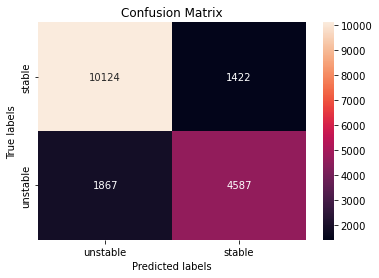

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['unstable', 'stable']); ax.yaxis.set_ticklabels(['stable', 'unstable']);

In [18]:
from sklearn.metrics import classification_report
ac=accuracy_score(y_test,y_pred)
print('Accuracy ={:0.3f}'.format(ac))
print(classification_report(y_test, y_pred, target_names=['unstable','stable']))

Accuracy =0.817
              precision    recall  f1-score   support

    unstable       0.84      0.88      0.86     11546
      stable       0.76      0.71      0.74      6454

    accuracy                           0.82     18000
   macro avg       0.80      0.79      0.80     18000
weighted avg       0.82      0.82      0.82     18000

